# Convolutional Neural Networks

Up until transformers, convolutions were *the* state of the art in computer vision.  In many ways and applications they still are!

Large Language Models, which are what we'll focus on the rest of the series after this lecture, are really good at ordered, *tokenized data.  But there is lots of data that isn't _implicitly_ ordered like `images`, and their more general cousins `graphs`.

Today's lecture focuses on computer vision models, and particularly on convolutional neural networks.  There are a ton of applications you can do with these, and not nearly enough time to get into them.  Check out the extra references file to see some publications to get you started if you want to learn more.


## Convolutional Networks: A brief historical context

![ImageNet.png](https://raw.githubusercontent.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/main/Week_5/figures/ImageNet.png)

[reference](https://www.researchgate.net/publication/332452649_A_Roadmap_for_Foundational_Research_on_Artificial_Intelligence_in_Medical_Imaging_From_the_2018_NIHRSNAACRThe_Academy_Workshop)

# Convolutional Building Blocks

We're going to go through some examples of building blocks for convolutional networks.  To help illustate some of these, let's use an image for examples:

In [5]:
import torch, torchvision

In [9]:
from PIL import Image
cat_image = Image.open("Cat.png")

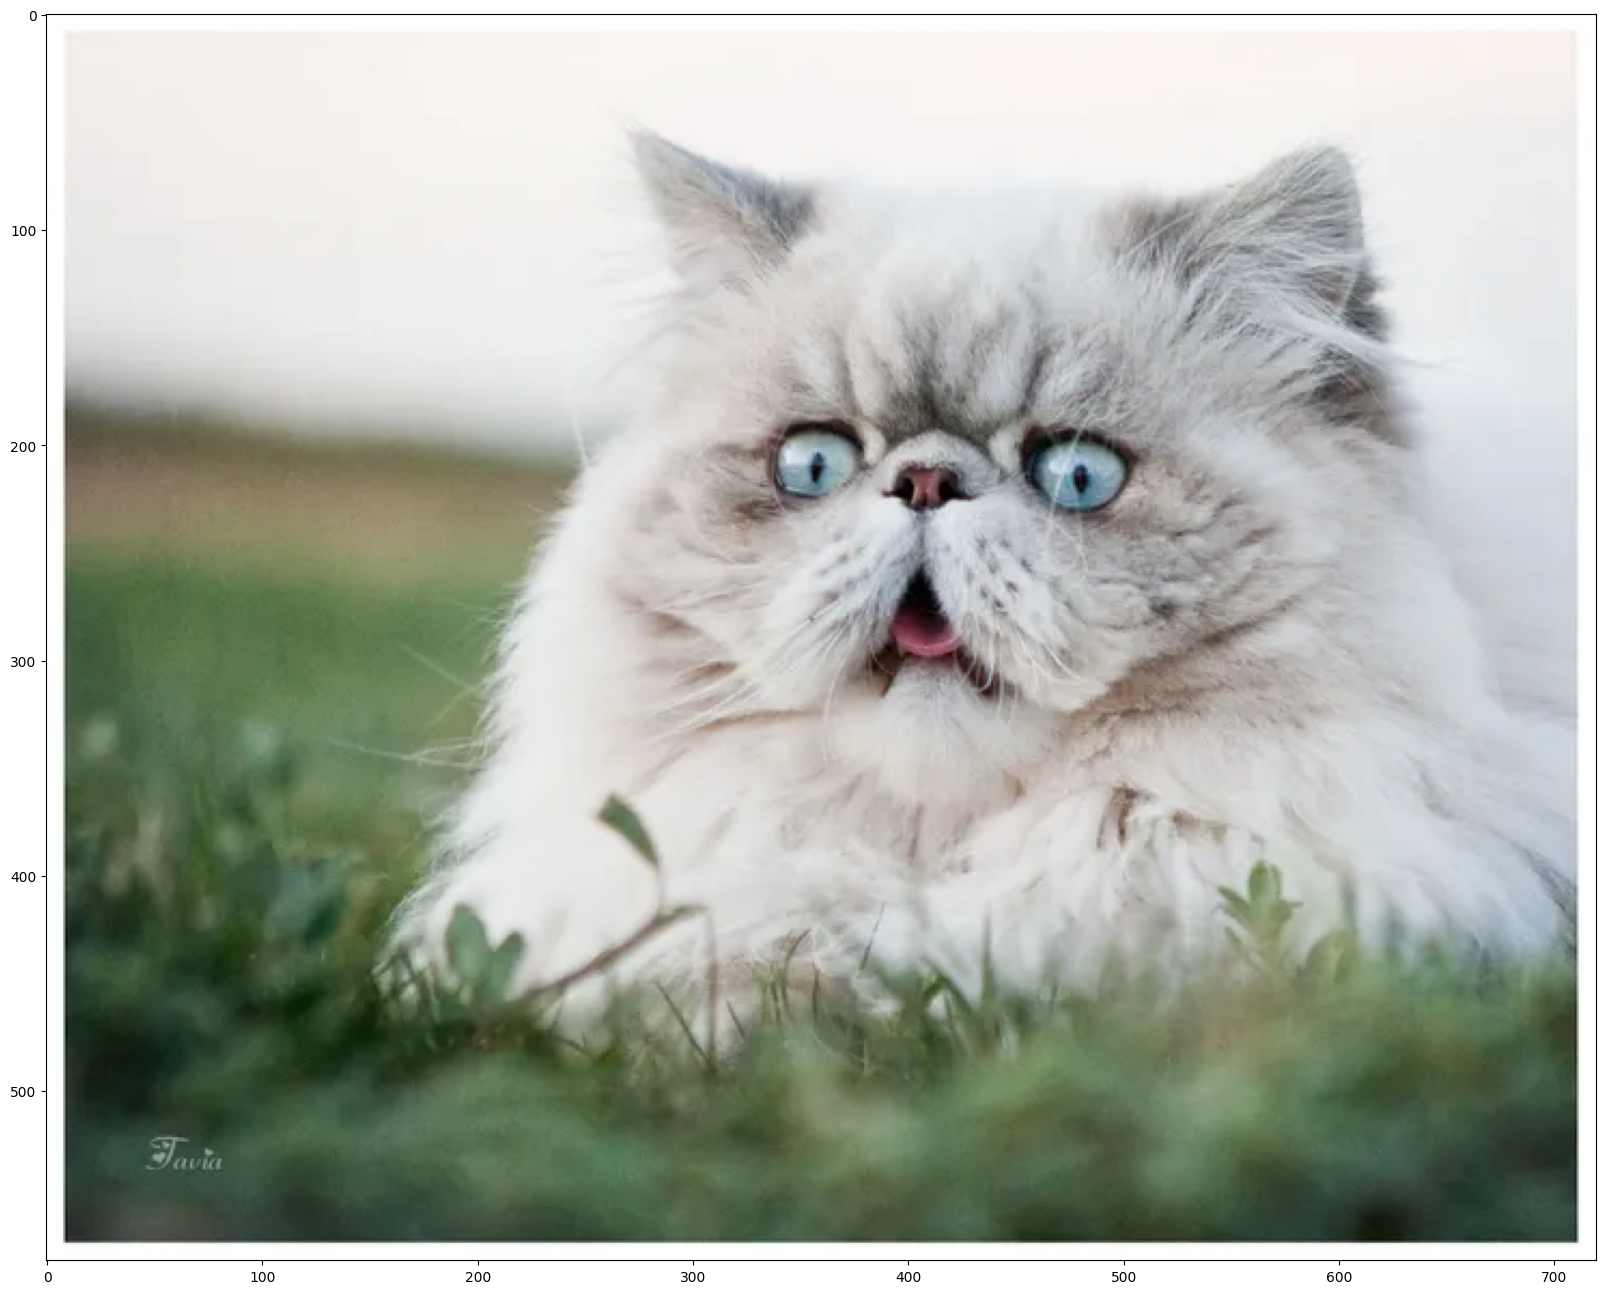

In [10]:
from matplotlib import pyplot as plt
figure = plt.figure(figsize=(20,20))
plt.imshow(cat_image)
plt.show()

## Convolutions

Convolutions are a restriction of - and a specialization of - dense linear layers.  A convolution of an image produces another image, and each output pixel is a function of only it's local neighborhood of points.  This is called an _inductive bias_ and is a big reason why convolutions work for image data: neighboring pixels are correlated and you can operate on just those pixels at a time.

See examples of convolutions [here](https://github.com/vdumoulin/conv_arithmetic)

![image-2.png](https://raw.githubusercontent.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/main/Week_5/figures/eqn.png)

![image.png](https://raw.githubusercontent.com/JaredKeithAveritt/AI_methods_in_advanced_materials_research/main/Week_5/figures/Unknown-2.png)

# Applying a convolutional filter to an image 

The purpose of this operation is to showcase how convolutional neural network (CNN) components, like convolutional layers, manipulate image data. This can be essential for tasks in image processing and machine learning, such as feature extraction and image transformation. 

The process involves converting an image into a tensor format, applying a convolution operation with a randomly generated filter, and then visualizing the resulting transformed image.

---

### Code Breakdown

1. **Image to Tensor Conversion**:
   ```python
   cat_tensor = torchvision.transforms.ToTensor()(cat_image)
   ```
   - `torchvision.transforms.ToTensor()`: Converts a PIL image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
   - `cat_image`: The original image of a cat, expected to be in PIL format.
   - `cat_tensor`: The resulting tensor from the conversion, representing the image.

2. **Reshape the Tensor**:
   ```python
   cat_tensor = cat_tensor.reshape((1,) + cat_tensor.shape)
   ```
   - `reshape((1,) + cat_tensor.shape)`: Adds a batch dimension to the tensor, making its shape (1, C, H, W), which is necessary for the convolution operation in PyTorch.

3. **Create a Random Convolution Filter**:
   ```python
   conv_random = torch.rand((3,3,15,15))
   ```
   - `torch.rand((3,3,15,15))`: Generates a tensor with random values, following a uniform distribution between 0 and 1. The dimensions (3, 3, 15, 15) correspond to (channels_in, channels_out, kernel_height, kernel_width).
   - `conv_random`: The randomly generated convolutional filter used for the operation.

4. **Apply the Convolution**:
   ```python
   cat_rand = torch.nn.functional.conv2d(cat_tensor, conv_random)
   ```
   - `torch.nn.functional.conv2d`: Applies a 2D convolution over an input signal composed of several input planes. In this case, it is used to apply the `conv_random` filter to `cat_tensor`.
   - `cat_rand`: The output tensor after applying the convolution, holding the filtered image data.

5. **Normalize the Output**:
   ```python
   cat_rand = (1./cat_rand.max()) * cat_rand
   ```
   - `cat_rand.max()`: Finds the maximum value within the `cat_rand` tensor.
   - `(1./cat_rand.max()) * cat_rand`: Normalizes the tensor so that all values are between 0 and 1, suitable for image representation.

6. **Reshape for Visualization**:
   ```python
   cat_rand = cat_rand.reshape(cat_rand.shape[1:])
   ```
   - `reshape(cat_rand.shape[1:])`: Removes the batch dimension from the output tensor, changing its shape back to (C, H, W) for visualization.

7. **Adjust the Channels for Visualization**:
   ```python
   rand_image = cat_rand.permute((1,2,0)).cpu()
   ```
   - `permute((1,2,0))`: Rearranges the dimensions of `cat_rand` so that it matches the image format expected by matplotlib (H, W, C).
   - `cpu()`: Ensures that the tensor is moved to the CPU's memory space if it was previously on a different device (like a GPU).

8. **Plotting**:
   ```python
   figure = plt.figure(figsize=(20,20))
   plt.imshow(rand_image)
   ```
   - `plt.figure(figsize=(20,20))`: Creates a new matplotlib figure with specified size.
   - `plt.imshow(rand_image)`: Displays the transformed image using matplotlib.

This code effectively illustrates the application of a convolution operation to an image and provides a visual understanding of how different filters can affect image data, which is foundational in the operation of CNNs in deeper machine learning tasks.

torch.Size([1, 3, 565, 706])
torch.Size([1, 3, 579, 720])


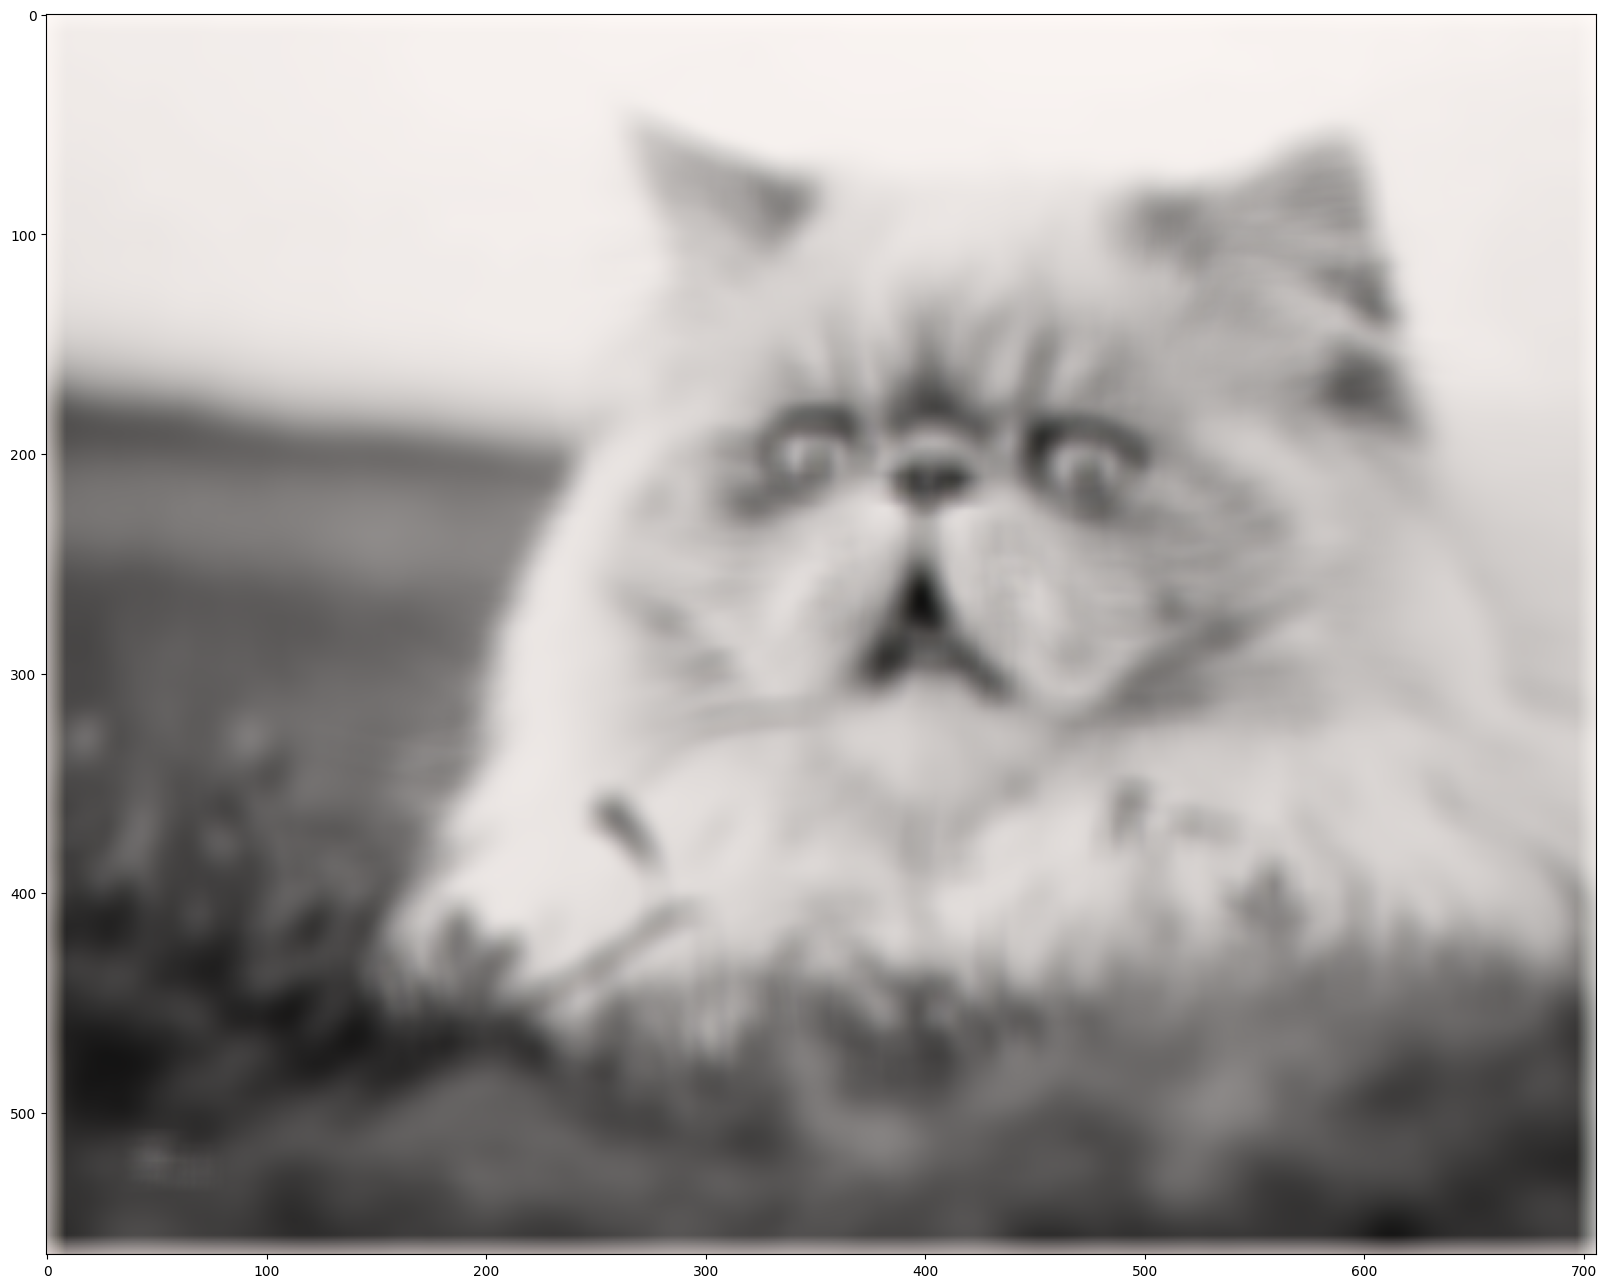

In [12]:
# Let's apply a convolution to the Cat photo:
cat_tensor = torchvision.transforms.ToTensor()(cat_image)

# Reshape the tensor to have a batch size of 1:
cat_tensor = cat_tensor.reshape((1,) + cat_tensor.shape)

# Create a random convolution:
# shape is: (channels_in, channels_out, kernel_x, kernel_y)
conv_random = torch.rand((3,3,15,15))

cat_rand = torch.nn.functional.conv2d(cat_tensor, conv_random)
cat_rand = (1./cat_rand.max()) * cat_rand
print(cat_rand.shape)
cat_rand = cat_rand.reshape(cat_rand.shape[1:])

print(cat_tensor.shape)

rand_image = cat_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)

## Normalization:

![Batch Norm](batch_norm.png)
Reference: [Normalizations](https://arxiv.org/pdf/1903.10520.pdf)

Normalization is the act of transforming the mean and moment of your data to standard values (usually 0.0 and 1.0).  It's particularly useful in machine learning since it stabilizes training, and allows higher learning rates.

![Batch Normalization accelerates training](batch_norm_effect.png)

Reference: [Batch Norm](https://arxiv.org/pdf/1502.03167.pdf)

---

Batch Normalization is a common preprocessing step in image processing and machine learning, which involves adjusting the range of pixel intensity values. The purpose of normalization is often to bring the input features to a similar scale, improving the convergence of machine learning models and reducing dependency on the choice of units.

In this example, the image of a cat is converted into a tensor format, normalized, and then displayed. This demonstrates how normalization affects the pixel values of the image and helps in preparing the image for further processing in neural network models.

---

### Code Breakdown

1. **Image to Tensor Conversion**:
   ```python
   cat_tensor = torchvision.transforms.ToTensor()(cat_image)
   ```
   - `torchvision.transforms.ToTensor()`: Converts a PIL image or numpy.ndarray (H x W x C) from the range [0, 255] to a floating-point tensor of shape (C x H x W) in the range [0.0, 1.0].
   - `cat_image`: The original image of a cat, expected to be in PIL format.
   - `cat_tensor`: The tensor resulting from the conversion, representing the image.

2. **Reshape the Tensor**:
   ```python
   cat_tensor = cat_tensor.reshape((1,) + cat_tensor.shape)
   ```
   - `reshape((1,) + cat_tensor.shape)`: Modifies the tensor to add a batch dimension, changing its shape to (1, C, H, W), which is necessary for many PyTorch operations, including normalization.

3. **Apply the Normalization**:
   ```python
   cat_rand = torch.nn.functional.normalize(cat_tensor)
   ```
   - `torch.nn.functional.normalize`: Applies L2 normalization to the input tensor along its features dimension, which, in the context of image data, adjusts the values so that each feature vector has a length of 1.
   - `cat_rand`: The tensor after normalization, holding the normalized image data.

4. **Reshape for Visualization**:
   ```python
   cat_rand = cat_rand.reshape(cat_rand.shape[1:])
   ```
   - `reshape(cat_rand.shape[1:])`: Removes the batch dimension from the tensor, making its shape suitable for image representation (C, H, W).

5. **Print Tensor Shape**:
   ```python
   print(cat_tensor.shape)
   ```
   - Prints the shape of the original image tensor, which helps in understanding the dimensions being worked with (should be in the format (1, C, H, W)).

6. **Adjust the Channels for Visualization**:
   ```python
   rand_image = cat_rand.permute((1,2,0)).cpu()
   ```
   - `permute((1,2,0))`: Reorders the dimensions of the normalized tensor to match the expected input format of matplotlib for images (H, W, C).
   - `cpu()`: Ensures that the tensor is transferred back to the CPU from other devices (like GPUs), if applicable.

7. **Plotting**:
   ```python
   figure = plt.figure(figsize=(20,20))
   plt.imshow(rand_image)
   ```
   - `plt.figure(figsize=(20,20))`: Creates a new figure window with a specified size for displaying the image.
   - `plt.imshow(rand_image)`: Displays the normalized image using matplotlib.

By normalizing and then visualizing the image tensor, this demonstrates how normalization can affect the appearance of an image and highlights the importance of this preprocessing step in the context of neural network training and image processing tasks.

torch.Size([1, 3, 579, 720])


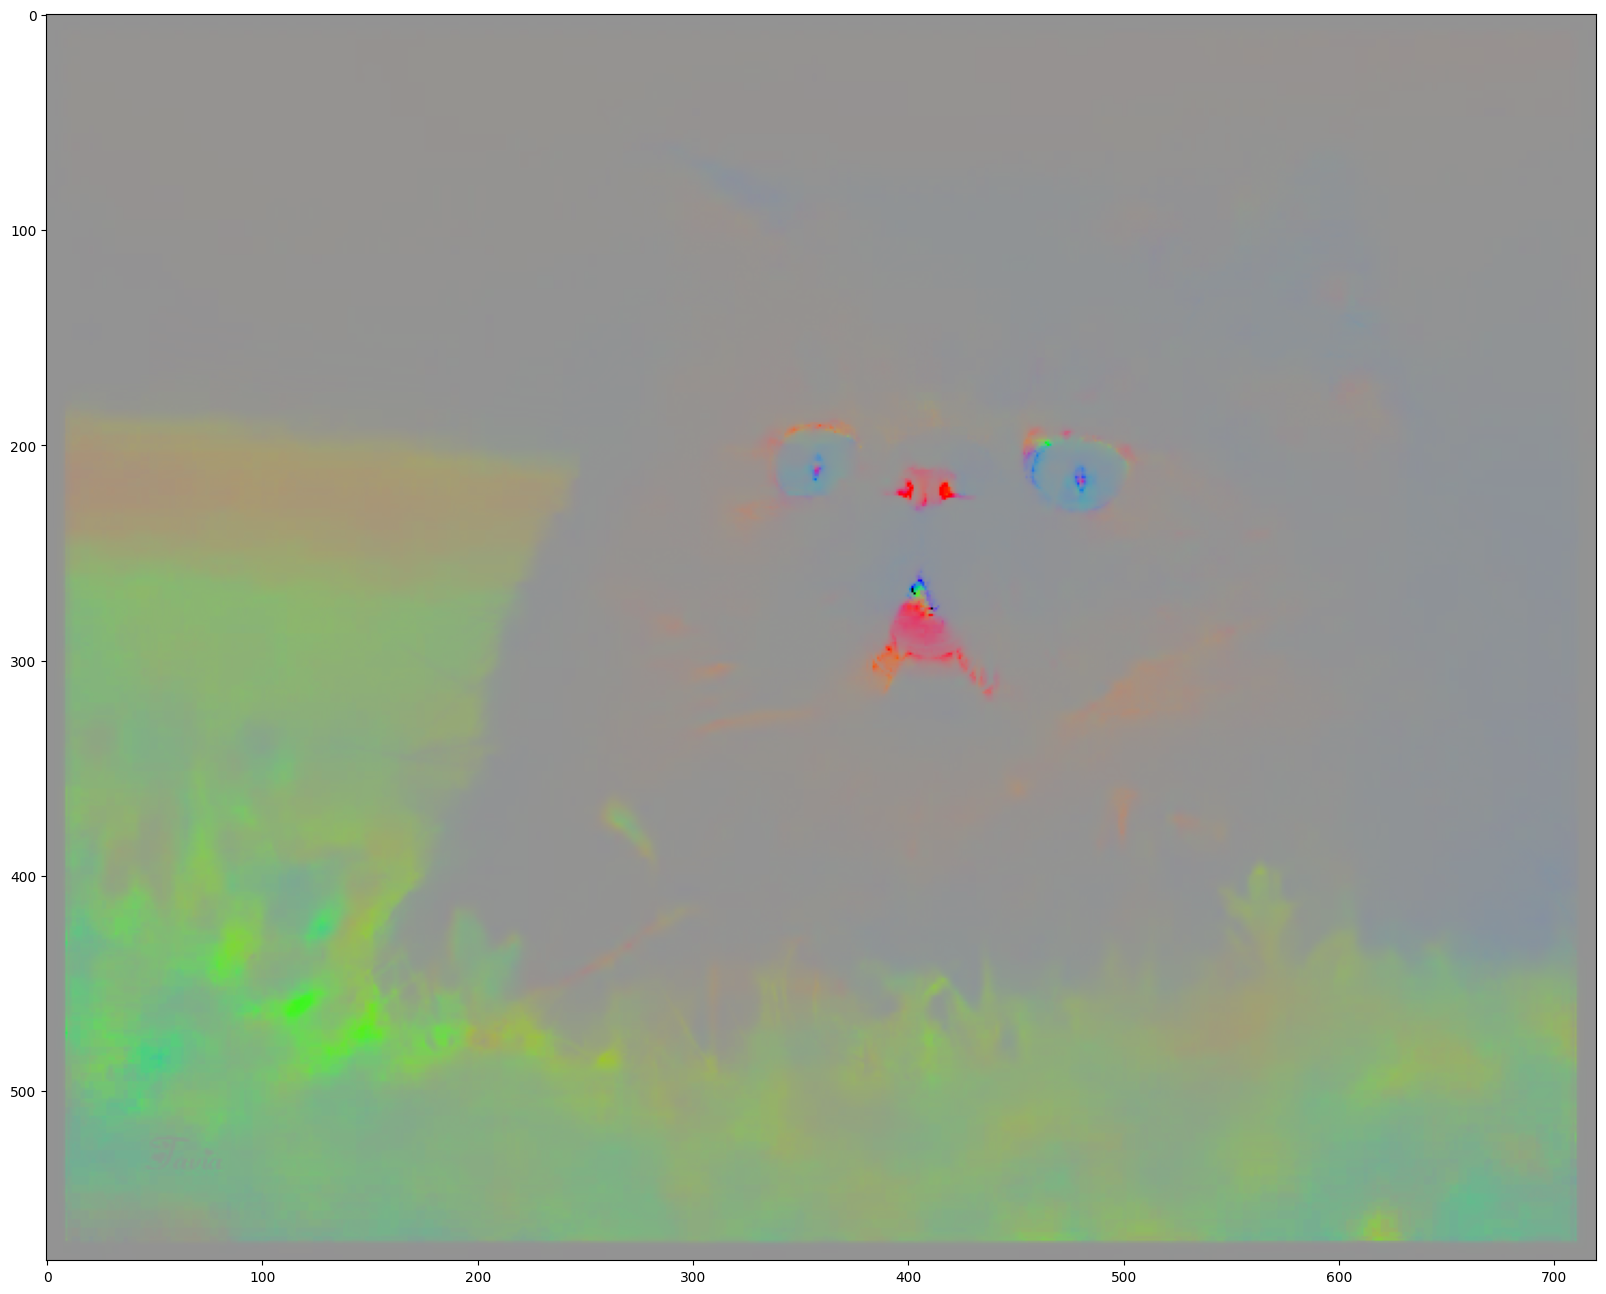

In [13]:
# Let's apply a normalization to the cat photo:
cat_tensor = torchvision.transforms.ToTensor()(cat_image)

# Reshape the tensor to have a batch size of 1:
cat_tensor = cat_tensor.reshape((1,) + cat_tensor.shape)

cat_rand = torch.nn.functional.normalize(cat_tensor)
cat_rand = cat_rand.reshape(cat_rand.shape[1:])

print(cat_tensor.shape)

rand_image = cat_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)


## Downsampling (And upsampling)

Downsampling is a critical component of convolutional and many vision models.  Because of the local-only nature of convolutional filters, learning large-range features can be too slow for convergence.  Downsampling of layers can bring information from far away closer, effectively changing what it means to be "local" as the input to a convolution.

![Convolutional Pooling](conv_pooling.png "Pooling")

[Reference](https://www.researchgate.net/publication/333593451_Application_of_Transfer_Learning_Using_Convolutional_Neural_Network_Method_for_Early_Detection_of_Terry's_Nail)

---

## Max pooling: 

is a common operation in the field of computer vision, particularly within convolutional neural networks (CNNs), used to reduce the spatial dimensions (height and width) of the input volume for the next convolution layer. It works by sliding a window (pool size) over the input and taking the maximum value within each window. This process reduces the resolution of the image while maintaining the significant features, thus aiding in reducing computational cost and overfitting.

In this example, we apply a 2x2 max pooling operation to an image tensor, effectively reducing its height and width by a factor of two.

---

### Code Breakdown

1. **Image to Tensor Conversion**:
   ```python
   cat_tensor = torchvision.transforms.ToTensor()(cat_image)
   ```
   - `torchvision.transforms.ToTensor()`: Converts a PIL Image or a NumPy ndarray into a FloatTensor, scaling the image's pixel intensity values to the range [0, 1]. The resulting tensor is in the format (C, H, W).
   - `cat_image`: The original image of a cat, expected to be in PIL format.
   - `cat_tensor`: The tensor representing the converted image.

2. **Reshape the Tensor**:
   ```python
   cat_tensor = cat_tensor.reshape((1,) + cat_tensor.shape)
   ```
   - This line adds a batch dimension to the tensor, modifying its shape to (1, C, H, W), which is the required input format for many PyTorch functions, including the max pooling operation.

3. **Apply Max Pooling**:
   ```python
   cat_rand = torch.nn.functional.max_pool2d(cat_tensor, 2)
   ```
   - `torch.nn.functional.max_pool2d`: Applies a 2D max pooling operation over the input tensor. In this case, the kernel size is set to 2, which reduces the height and width of the image by half.
   - `cat_rand`: The tensor after the max pooling operation, containing the pooled image data.

4. **Reshape for Visualization**:
   ```python
   cat_rand = cat_rand.reshape(cat_rand.shape[1:])
   ```
   - This line removes the batch dimension from the pooled tensor, converting its shape back to (C, H, W) for visualization purposes.

5. **Print Tensor Shape**:
   ```python
   print(cat_tensor.shape)
   ```
   - This line outputs the shape of the original image tensor, which helps in verifying the dimensions before and after pooling (the shape should be (1, C, H, W)).

6. **Adjust the Channels for Visualization**:
   ```python
   rand_image = cat_rand.permute((1,2,0)).cpu()
   ```
   - `permute((1,2,0))`: Changes the order of the tensor dimensions to (H, W, C), which is the format expected by matplotlib for displaying images.
   - `cpu()`: Ensures that the tensor is on the CPU, which is necessary for compatibility with many NumPy and matplotlib operations.

7. **Plotting**:
   ```python
   figure = plt.figure(figsize=(20,20))
   plt.imshow(rand_image)
   ```
   - `plt.figure(figsize=(20,20))`: Creates a new figure with a specified size.
   - `plt.imshow(rand_image)`: Displays the image after max pooling using matplotlib.

By applying max pooling to the image and visualizing the result, this demonstrates how max pooling reduces image dimensions while preserving the most prominent features. This is a key step in processing images for deep learning applications, particularly in reducing the complexity and computational requirements of neural network models.

torch.Size([1, 3, 579, 720])


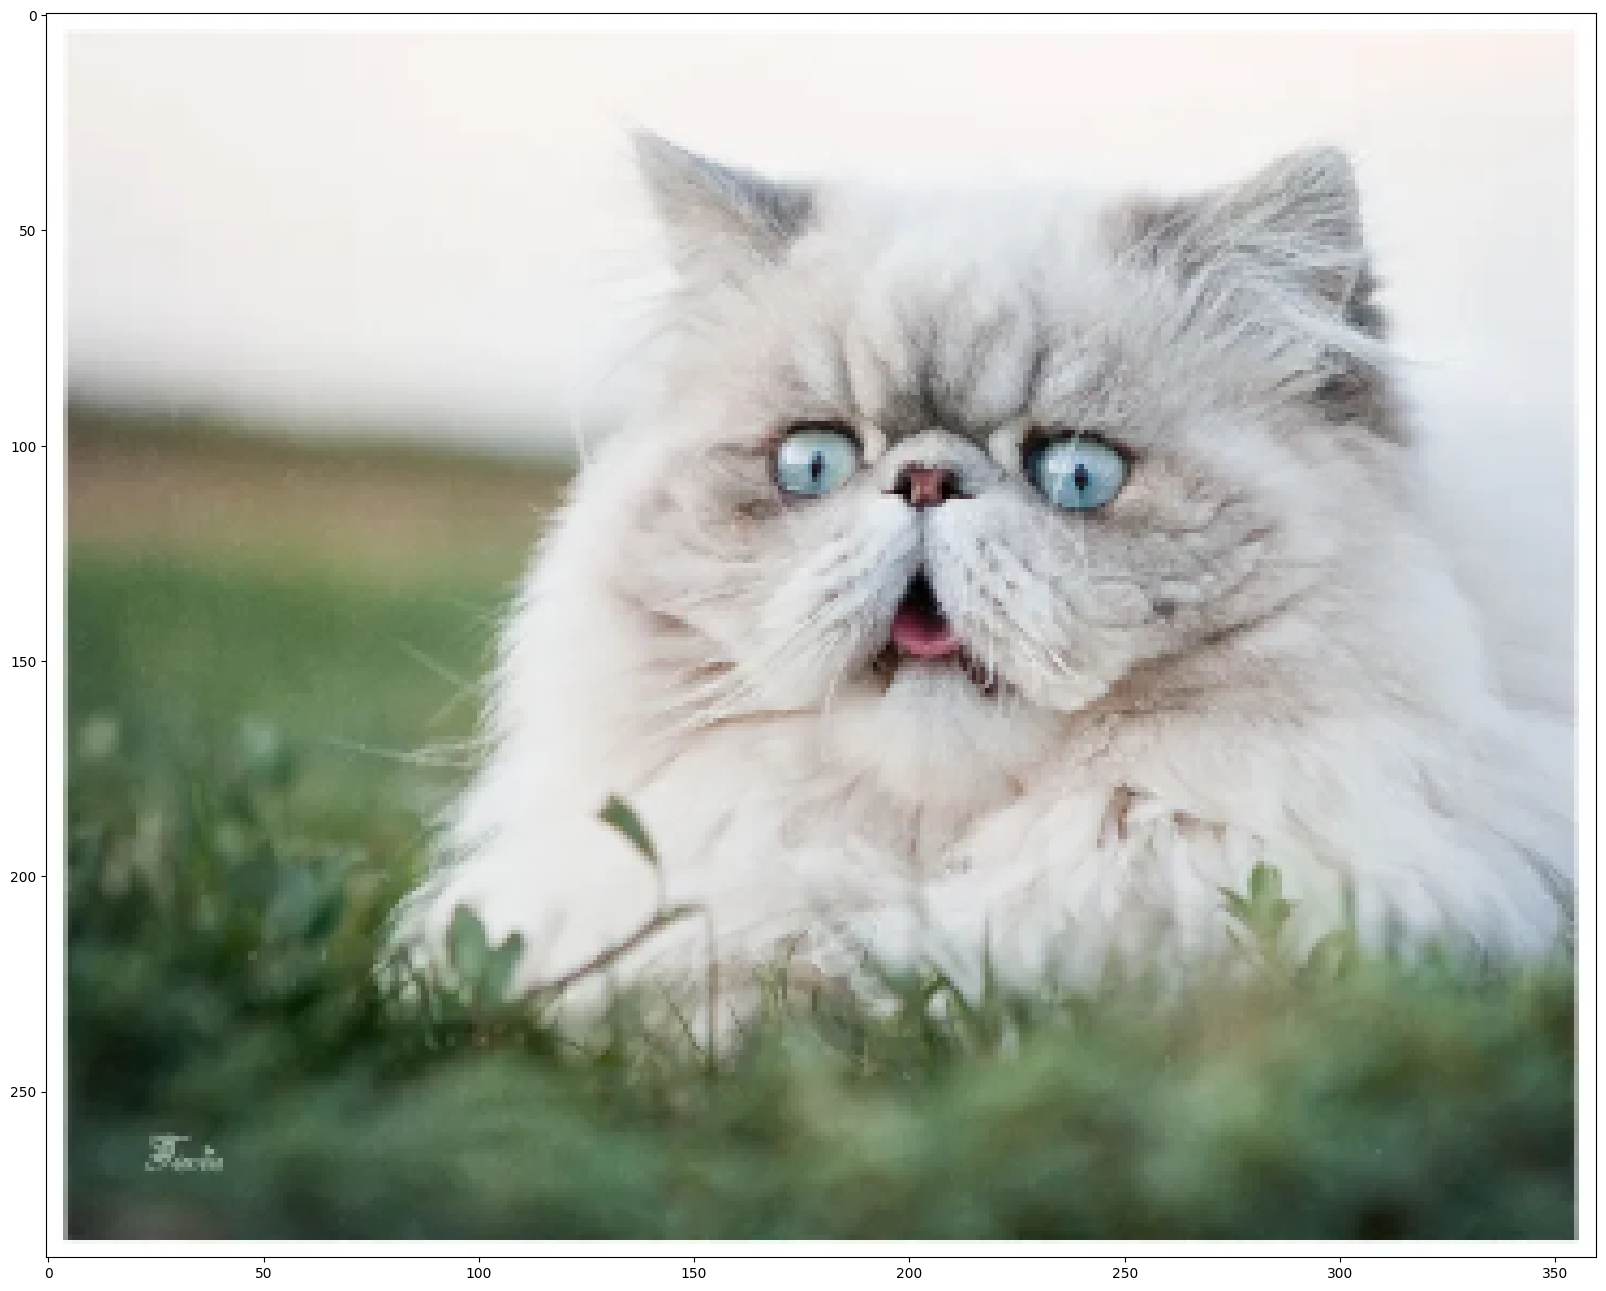

In [14]:
# Let's apply a normalization to the cat photo:
cat_tensor = torchvision.transforms.ToTensor()(cat_image)

# Reshape the tensor to have a batch size of 1:
cat_tensor = cat_tensor.reshape((1,) + cat_tensor.shape)


cat_rand = torch.nn.functional.max_pool2d(cat_tensor, 2)
cat_rand = cat_rand.reshape(cat_rand.shape[1:])

print(cat_tensor.shape)

rand_image = cat_rand.permute((1,2,0)).cpu()

figure = plt.figure(figsize=(20,20))

plt.imshow(rand_image)

## Residual Connections

One issue, quickly encountered when making convolutional networks deeper and deeper, is the "Vanishing Gradients" problem.  As layers were stacked on top of each other, the size of updates dimished at the earlier layers of a convolutional network.  The paper "Deep Residual Learning for Image Recognition" solved this by introduction "residual connections" as skip layers.


Reference: [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)

![Residual Layer](residual_layer.png)


Compare the performance of the models before and after the introduction of these layers:

![Resnet Performance vs. Plain network performance](resnet_comparison.png)

If you have time to read only one paper on computer vision, make it this one!  Resnet was the first model to beat human accuracy on ImageNet and is one of the most impactful papers in AI ever published.

---

# Building a ConvNet

In this section we'll build and apply a conv net to the mnist dataset.  The layers here are loosely based off of the ConvNext architecture.  Why?  Because we're getting into LLM's soon, and this ConvNet uses LLM features.  ConvNext is an update to the ResNet architecture that outperforms it.

[ConvNext](https://arxiv.org/abs/2201.03545)

---

## How to load and preprocess the CIFAR-10 dataset

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 testing images. The code below applies various transformations to augment the training data and improve model generalization. It also splits the training data into training and validation sets and prepares DataLoader objects for efficient data handling during model training.

The CIFAR-10 dataset - slightly harder than MNIST but still relatively easy and computationally tractable.

---

### Code Breakdown

1. **Importing Required Modules**:
   ```python
   from torchvision.transforms import v2
   ```
   - This line imports the version 2 (v2) of torchvision transforms, which includes advanced image transformation capabilities.

2. **Loading Training Data**:
   ```python
   training_data = torchvision.datasets.CIFAR10(
       root="/nas/longleaf/home/jarkeith/datasets/CIFAR-10/",
       train=True,
       download=True,
       transform=v2.Compose([
           v2.ToTensor(),
           v2.RandomHorizontalFlip(),
           v2.RandomResizedCrop(size=32, scale=[0.85,1.0], antialias=False),
           v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
       ])
   )
   ```
   - `torchvision.datasets.CIFAR10`: Loads the CIFAR-10 dataset.
   - `root`: Specifies the directory where the dataset is stored.
   - `train=True`: Indicates that the training data should be loaded.
   - `download=True`: Allows the dataset to be downloaded if it's not available at the specified path.
   - `transform`: Defines the preprocessing and augmentation transformations to be applied to the images:
     - `v2.ToTensor()`: Converts the images to PyTorch tensors.
     - `v2.RandomHorizontalFlip()`: Randomly flips the images horizontally.
     - `v2.RandomResizedCrop(size=32, scale=[0.85,1.0])`: Performs random crops of the images.
     - `v2.ColorJitter(...)`: Randomly changes the brightness, contrast, and saturation of the images.

3. **Loading Test Data**:
   ```python
   test_data = torchvision.datasets.CIFAR10(
       root="/nas/longleaf/home/jarkeith/datasets/CIFAR-10/",
       train=False,
       download=True,
       transform=torchvision.transforms.ToTensor()
   )
   ```
   - Similar to the training data but without the augmentation transformations, ensuring the test data remains unaltered for accurate evaluation.

4. **Splitting Training Data**:
   ```python
   training_data, validation_data = torch.utils.data.random_split(training_data, [40000, 10000], generator=torch.Generator().manual_seed(55))
   ```
   - Splits the original training dataset into new training and validation datasets, containing 40,000 and 10,000 images, respectively, using a random seed for reproducibility.

5. **Setting Batch Size**:
   ```python
   batch_size = 128
   ```
   - Defines the number of samples that will be propagated through the network before the model's internal parameters are updated.

6. **Creating DataLoaders**:
   ```python
   train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, pin_memory=True, shuffle=True, num_workers=4)
   val_dataloader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size, pin_memory=True, shuffle=False, num_workers=4)
   ```
   - `DataLoader`: Wraps the datasets to provide batches of images and corresponding labels for training and validation.
   - `batch_size`: Specifies the number of images per batch.
   - `pin_memory`: If True, enables faster data transfer to CUDA-enabled GPUs.
   - `shuffle`: Determines whether the data should be shuffled before each epoch (True for training data, False for validation data).
   - `num_workers`: Specifies the number of subprocesses to use for data loading.

By structuring the CIFAR-10 dataset loading and preprocessing in this manner, the code snippet facilitates the efficient training and validation of deep learning models, leveraging data augmentation and batch processing to enhance performance and generalizability.

In [15]:
from torchvision.transforms import v2
training_data = torchvision.datasets.CIFAR10(
    root="/nas/longleaf/home/jarkeith/datasets/CIFAR-10/",
    train=True,
    download=True,
    transform=v2.Compose([
        v2.ToTensor(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=32, scale=[0.85,1.0], antialias=False),
        v2.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    ])
)

test_data = torchvision.datasets.CIFAR10(
    root="/nas/longleaf/home/jarkeith/datasets/CIFAR-10/",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

training_data, validation_data = torch.utils.data.random_split(training_data, [0.8, 0.2], generator=torch.Generator().manual_seed(55))

batch_size = 128

# The dataloader makes our dataset iterable 
train_dataloader = torch.utils.data.DataLoader(training_data, 
    batch_size=batch_size, 
    pin_memory=True,
    shuffle=True, 
    num_workers=4)
val_dataloader = torch.utils.data.DataLoader(validation_data, 
    batch_size=batch_size, 
    pin_memory=True,
    shuffle=False, 
    num_workers=4)


/nas/longleaf/home/jarkeith/.conda/envs/TorchANI/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/nas/longleaf/home/jarkeith/.conda/envs/TorchANI/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to u

Files already downloaded and verified
Files already downloaded and verified


In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

### How to visualize an image from a batch of data obtained from a DataLoader in PyTorch

---

DataLoaders are used in PyTorch to load data in batches, and they are commonly used during the training of neural networks. Visualizing an image from a batch can help verify data loading and preprocessing steps, ensuring that the data is correctly formatted before being fed into a neural network for training.

---

### Code Breakdown

1. **Extracting a Batch from the DataLoader**:
   ```python
   batch, (X, Y) = next(enumerate(train_dataloader))
   ```
   - `enumerate(train_dataloader)`: Iterates over the DataLoader object, providing pairs of indices (batch number) and data (images and labels).
   - `next(...)`: Fetches the next item from the iterator, which in this case, is the first batch of images and their corresponding labels from the DataLoader.
   - `batch`: The index of the current batch (not used in the subsequent code for visualization but useful for tracking batch numbers).
   - `(X, Y)`: A tuple where `X` contains the images, and `Y` contains the corresponding labels for the batch. `X` and `Y` are tensors.

2. **Visualizing an Image**:
   ```python
   plt.imshow(X[0].cpu().permute((1,2,0))); plt.show()
   ```
   - `X[0]`: Extracts the first image from the batch. `X` is a tensor of shape `[batch_size, channels, height, width]`, so `X[0]` refers to the first image in the batch.
   - `cpu()`: Ensures that the tensor is transferred back to the CPU from other devices (like GPUs), if applicable. This is necessary because `matplotlib` can only work with CPU tensors.
   - `permute((1,2,0))`: Changes the order of the tensor dimensions from `[channels, height, width]` to `[height, width, channels]`. This is needed because `matplotlib` expects images in the format (H, W, C), but PyTorch tensors use the format (C, H, W).
   - `plt.imshow(...)`: Uses `matplotlib` to display the image.
   - `plt.show()`: Renders the figure so that it is displayed to the user.

By executing this code, a single image from the first batch of the training dataset is displayed. This is useful for verifying the appearance and preprocessing of images that are being used for training a machine learning model. It helps ensure that the data is correctly processed and ready for model input.

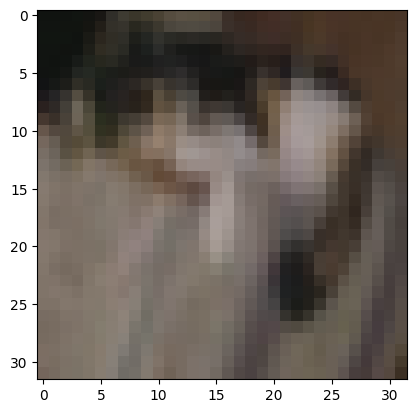

In [17]:
batch, (X, Y) = next(enumerate(train_dataloader))

# add what it looks like normally.
plt.imshow(X[0].cpu().permute((1,2,0))); plt.show()

---

## Introduction

It includes setting up a computation device (CPU or CUDA-based GPU), defining a preprocessing function for data, and wrapping the DataLoader to apply this preprocessing automatically to each batch. This setup is particularly useful for ensuring that data fed into a neural network is correctly formatted and transferred to the appropriate device (CPU or GPU) for computation.

---

### Code Breakdown

1. **Device Setup**:
   ```python
   dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
   ```
   - Determines whether a CUDA-compatible GPU is available for PyTorch to use. If available, `dev` is set to use the GPU (`"cuda"`); otherwise, it defaults to using the CPU (`"cpu"`). This device setting is used to move tensors to the correct device before operations are performed on them.

2. **Preprocessing Function**:
   ```python
   def preprocess(x, y):
       return x.view(-1, 3, 32, 32).to(dev), y.to(dev)
   ```
   - `preprocess`: A function designed to reshape and transfer a batch of images (`x`) and their labels (`y`) to the designated computation device.
   - `x.view(-1, 3, 32, 32)`: Reshapes the input batch `x` into the correct format for CIFAR-10 images, which is `[batch_size, channels, height, width]` with 3 color channels and 32x32 pixels per image.
   - `.to(dev)`: Moves the tensors to the device specified by `dev`, ensuring that both the images and labels are on the same device (either CPU or GPU).

3. **WrappedDataLoader Class**:
   ```python
   class WrappedDataLoader:
       def __init__(self, dl, func):
           self.dl = dl
           self.func = func

       def __len__(self):
           return len(self.dl)

       def __iter__(self):
           for b in self.dl:
               yield (self.func(*b))
   ```
   - `WrappedDataLoader`: A class designed to wrap a standard PyTorch DataLoader (`dl`) and apply a preprocessing function (`func`) to each batch.
   - `__init__(self, dl, func)`: Initializes the wrapped dataloader with the original dataloader and the preprocessing function.
   - `__len__(self)`: Allows the wrapped dataloader to return the number of batches available, equivalent to the length of the original dataloader.
   - `__iter__(self)`: Defines an iterator that applies the preprocessing function to each batch from the original dataloader, yielding processed batches ready for neural network input.

4. **Applying WrappedDataLoader**:
   ```python
   train_dataloader = WrappedDataLoader(train_dataloader, preprocess)
   val_dataloader = WrappedDataLoader(val_dataloader, preprocess)
   ```
   - Wraps the original training and validation DataLoaders using the `WrappedDataLoader` class. This ensures that each batch of data fetched from these DataLoaders is automatically preprocessed (reshaped and transferred to the correct device) before being used in training or validation.

By utilizing this structure, the code ensures that all data passed through the dataloaders is automatically preprocessed according to the defined `preprocess` function. This setup streamlines the data handling pipeline, making it more efficient and reducing the risk of errors during model training and evaluation.

---

This code below is important as our models get bigger: this is wrapping the pytorch data loaders to put the data onto the GPU!

In [10]:
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")


def preprocess(x, y):
    # CIFAR-10 is *color* images so 3 layers!
    return x.view(-1, 3, 32, 32).to(dev), y.to(dev)


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        for b in self.dl:
            yield (self.func(*b))


train_dataloader = WrappedDataLoader(train_dataloader, preprocess)
val_dataloader = WrappedDataLoader(val_dataloader, preprocess)


---

## Building the Classification Model

This Python code snippet demonstrates how to create custom neural network modules using PyTorch for image classification tasks. The modules include a Downsampler for reducing spatial dimensions, a ConvNextBlock implementing a specific convolutional architecture, and a Classifier that aggregates these components into a full model.

---

### Code Breakdown

1. **Downsampler Module**:
   ```python
   class Downsampler(nn.Module):
       def __init__(self, in_channels, out_channels, shape, stride=2):
           super(Downsampler, self).__init__()
           self.norm = nn.LayerNorm([in_channels, *shape])
           self.downsample = nn.Conv2d(in_channels, out_channels, kernel_size=stride, stride=stride)
   
       def forward(self, inputs):
           return self.downsample(self.norm(inputs))
   ```
   - `Downsampler`: A custom PyTorch module for down-sampling input images. It first normalizes the input using Layer Normalization and then applies a 2D convolution with a stride greater than 1 to reduce the spatial dimensions.
   - `in_channels`: The number of input channels.
   - `out_channels`: The number of output channels after down-sampling.
   - `shape`: The spatial dimensions (height and width) of the input.
   - `stride`: The stride of the convolution, determining the factor by which the spatial dimensions are reduced.

2. **ConvNextBlock Module**:
   ```python
   class ConvNextBlock(nn.Module):
       def __init__(self, in_channels, shape):
           super(ConvNextBlock, self).__init__()
           self.conv1 = nn.Conv2d(in_channels, in_channels, groups=in_channels, kernel_size=[7,7], padding='same')
           self.norm = nn.LayerNorm([in_channels, *shape])
           self.conv2 = nn.Conv2d(in_channels, 4*in_channels, kernel_size=1)
           self.conv3 = nn.Conv2d(4*in_channels, in_channels, kernel_size=1)
   
       def forward(self, inputs):
           x = self.conv1(inputs)
           x = self.norm(x)
           x = self.conv2(x)
           x = torch.nn.functional.gelu(x)
           x = self.conv3(x)
           return x + inputs
   ```
   - `ConvNextBlock`: Represents a block in a ConvNeXt architecture, performing a series of convolutions and non-linear activations, combined with skip connections for residual learning.
   - `depthwise convolution`: A convolution where the number of groups equals the number of input channels, acting separately on each channel.
   - `LayerNorm`: Normalizes the features across the spatial dimensions.
   - `GELU`: Gaussian Error Linear Unit, a type of non-linear activation function.

3. **Classifier Module**:
   ```python
   class Classifier(nn.Module):
       def __init__(self, n_initial_filters, n_stages, blocks_per_stage):
           super(Classifier, self).__init__()
           self.stem = nn.Conv2d(3, n_initial_filters, kernel_size=1, stride=1)
           self.norm1 = nn.LayerNorm([n_initial_filters, 32, 32])
           self.layers = nn.Sequential()
           # Additional layers and blocks are added here...
           self.head = nn.Sequential(nn.Flatten(), nn.LayerNorm(current_n_filters), nn.Linear(current_n_filters, 10))
   
       def forward(self, inputs):
           x = self.stem(inputs)
           x = self.norm1(x)
           x = self.layers(x)
           x = nn.functional.avg_pool2d(x, x.shape[2:])
           x = self.head(x)
           return x
   ```
   - `Classifier`: A custom neural network model designed for image classification tasks. It starts with a convolutional stem to increase the number of channels, followed by Layer Normalization.
   - `n_initial_filters`: The number of filters in the initial convolutional layer.
   - `n_stages`: The number of stages in the network, each potentially containing multiple ConvNext blocks and possibly a downsampling layer.
   - `blocks_per_stage`: The number of ConvNext blocks per stage.
   - `Sequential`: Used to stack layers and blocks sequentially.
   - `Flatten`: Converts the multi-dimensional output into a one-dimensional tensor before passing it to the linear classification layer.
   - `avg_pool2d`: Averages over the spatial dimensions, reducing each feature map to a single value.

This architecture incorporates modern deep learning techniques, including depthwise separable convolutions, residual connections, and layer normalization, for processing images. The Classifier combines these elements in a sequential manner, creating a pipeline suitable for tasks

 like image classification on datasets like CIFAR-10.

In [19]:
from torch import nn


class Downsampler(nn.Module):

    def __init__(self, in_channels, out_channels, shape, stride=2):
        super(Downsampler, self).__init__()

        self.norm = nn.LayerNorm([in_channels, *shape])

        self.downsample = nn.Conv2d(
            in_channels=in_channels, 
            out_channels=out_channels,
            kernel_size = stride,
            stride = stride,
        )
    
    def forward(self, inputs):


        return self.downsample(self.norm(inputs))
        
        

class ConvNextBlock(nn.Module):
    """This block of operations is loosely based on this paper:

    """


    def __init__(self, in_channels, shape):
        super(ConvNextBlock, self).__init__()

        # Depthwise, seperable convolution with a large number of output filters:
        self.conv1 = nn.Conv2d(in_channels=in_channels, 
                                     out_channels=in_channels, 
                                     groups=in_channels,
                                     kernel_size=[7,7],
                                     padding='same' )

        self.norm = nn.LayerNorm([in_channels, *shape])

        # Two more convolutions:
        self.conv2 = nn.Conv2d(in_channels=in_channels, 
                                     out_channels=4*in_channels,
                                     kernel_size=1)

        self.conv3 = nn.Conv2d(in_channels=4*in_channels, 
                                     out_channels=in_channels,
                                     kernel_size=1
                                     )


    def forward(self, inputs):
        x = self.conv1(inputs)

        # The normalization layer:
        x = self.norm(x)

        x = self.conv2(x)

        # The non-linear activation layer:
        x = torch.nn.functional.gelu(x)

        x = self.conv3(x)

        # This makes it a residual network:
        return x + inputs
    

class Classifier(nn.Module):


    def __init__(self, n_initial_filters, n_stages, blocks_per_stage):
        super(Classifier, self).__init__()

        # This is a downsampling convolution that will produce patches of output.

        # This is similar to what vision transformers do to tokenize the images.
        self.stem = nn.Conv2d(in_channels=3,
                                    out_channels=n_initial_filters,
                                    kernel_size=1,
                                    stride=1)
        
        current_shape = [32, 32]

        self.norm1 = nn.LayerNorm([n_initial_filters,*current_shape])
        # self.norm1 = WrappedLayerNorm()

        current_n_filters = n_initial_filters
        
        self.layers = nn.Sequential()
        for i, n_blocks in enumerate(range(n_stages)):
            # Add a convnext block series:
            for _ in range(blocks_per_stage):
                self.layers.append(ConvNextBlock(in_channels=current_n_filters, shape=current_shape))
            # Add a downsampling layer:
            if i != n_stages - 1:
                # Skip downsampling if it's the last layer!
                self.layers.append(Downsampler(
                    in_channels=current_n_filters, 
                    out_channels=2*current_n_filters,
                    shape = current_shape,
                    )
                )
                # Double the number of filters:
                current_n_filters = 2*current_n_filters
                # Cut the shape in half:
                current_shape = [ cs // 2 for cs in current_shape]
            


        self.head = nn.Sequential(
            nn.Flatten(),
            nn.LayerNorm(current_n_filters),
            nn.Linear(current_n_filters, 10)
        )
        # self.norm2 = nn.InstanceNorm2d(current_n_filters)
        # # This brings it down to one channel / class
        # self.bottleneck = nn.Conv2d(in_channels=current_n_filters, out_channels=10, 
        #                                   kernel_size=1, stride=1)

    def forward(self, inputs):

        x = self.stem(inputs)
        # Apply a normalization after the initial patching:
        x = self.norm1(x)

        # Apply the main chunk of the network:
        x = self.layers(x)

        # Normalize and readout:
        x = nn.functional.avg_pool2d(x, x.shape[2:])
        x = self.head(x)

        return x



        # x = self.norm2(x)
        # x = self.bottleneck(x)

        # # Average pooling of the remaining spatial dimensions (and reshape) makes this label-like:
        # return nn.functional.avg_pool2d(x, kernel_size=x.shape[-2:]).reshape((-1,10))


## Instantiate on GPU (CUDA Device) and Summary of CNN

This Python code snippet is designed to initialize an instance of a custom neural network, `Classifier`, designed for image classification, move the model to a GPU if available, and use the `torchinfo` library to provide a detailed summary of the model. This process is crucial for verifying the model's architecture and understanding its computational requirements before training.

---

### Code Breakdown

1. **Model Instantiation**:
   ```python
   model = Classifier(64, 4, 2)
   ```
   - `Classifier`: The custom neural network class defined previously.
   - `64`: The number of initial filters for the first convolutional layer in the classifier.
   - `4`: The number of stages in the classifier model.
   - `2`: The number of ConvNext blocks per stage.
   - The instantiated model, `model`, represents the neural network ready to be trained or evaluated.

2. **Moving the Model to a CUDA Device**:
   ```python
   model.cuda()
   ```
   - Transfers the `model` to the GPU using CUDA if a compatible GPU is available. This is essential for leveraging GPU acceleration during training and inference. If the system does not have a CUDA-compatible GPU, this line should be modified accordingly, or it will default to using the CPU.

3. **Model Summary**:
   ```python
   from torchinfo import summary
   print(summary(model, input_size=(batch_size, 3, 32, 32)))
   ```
   - `from torchinfo import summary`: Imports the `summary` function from the `torchinfo` library, which is used to generate a comprehensive summary of the model.
   - `summary(model, input_size=(batch_size, 3, 32, 32))`: Generates a detailed summary of the model, including the total number of parameters, the size of each layer's output, and the computational requirements. The `input_size` parameter specifies the size of the input tensor that the model expects, which in this case corresponds to a typical batch of images for the CIFAR-10 dataset: a batch size of images with 3 color channels and 32x32 pixel resolution.
   - `print(...)`: Outputs the summary information to the console. This provides valuable insights into the model's architecture and can help identify potential issues or areas for optimization.

By completing these steps, the snippet effectively sets up a neural network model for image classification, ensuring it is ready for training on a GPU and clearly understood in terms of its structure and computational demands.

In [20]:
model = Classifier(64, 4, 2)

model.cuda()

from torchinfo import summary

print(summary(model, input_size=(batch_size, 3, 32, 32)))

Layer (type:depth-idx)                   Output Shape              Param #
Classifier                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 64, 32, 32]         256
├─LayerNorm: 1-2                         [128, 64, 32, 32]         131,072
├─Sequential: 1-3                        [128, 512, 4, 4]          --
│    └─ConvNextBlock: 2-1                [128, 64, 32, 32]         --
│    │    └─Conv2d: 3-1                  [128, 64, 32, 32]         3,200
│    │    └─LayerNorm: 3-2               [128, 64, 32, 32]         131,072
│    │    └─Conv2d: 3-3                  [128, 256, 32, 32]        16,640
│    │    └─Conv2d: 3-4                  [128, 64, 32, 32]         16,448
│    └─ConvNextBlock: 2-2                [128, 64, 32, 32]         --
│    │    └─Conv2d: 3-5                  [128, 64, 32, 32]         3,200
│    │    └─LayerNorm: 3-6               [128, 64, 32, 32]         131,072
│    │    └─Conv2d: 3-7                  [128, 256, 32,

![CNN](CNN.pdf)

The output of the code provides a detailed summary of the `Classifier` neural network model instantiated with specific parameters. Here's a breakdown of the information presented:

### Model Architecture Summary:

- **Layer Types and Indexes**: The summary lists each layer or block within the `Classifier` model, including their type (e.g., `Conv2d`, `LayerNorm`, `Sequential`, `Flatten`, `Linear`) and depth-index within the architecture.

- **Output Shape**: For each layer or block, the summary displays the shape of the output tensor that results from processing inputs through that layer. For example, the first `Conv2d` layer outputs tensors of shape `[128, 64, 32, 32]`, indicating a batch size of 128, with 64 feature maps, each of 32x32 pixels.

- **Parameter Count**: This shows the number of trainable parameters associated with each layer. For instance, the initial `Conv2d` layer has 256 parameters. The total number of parameters in the model is tallied at the bottom.

- **Classifier Block**: Represents the overarching model containing various components like the initial convolution (`Conv2d`), normalization (`LayerNorm`), and the sequential layers which in turn contain multiple `ConvNextBlock` and `Downsampler` instances.

- **Sequential and ConvNextBlock Layers**: These sections detail the internal structure and components of each repeated block or layer sequence, including depthwise convolutions, normalization, and downsampling operations, along with their parameters and output shapes.

### Model Statistics:

- **Total Parameters**: The sum of all trainable parameters in the model, 7,223,562 in this case, indicating the complexity and capacity of the neural network.

- **Trainable Parameters**: Confirms that all 7,223,562 parameters in the model are trainable, which means they will be updated during the training process.

- **Non-trainable Parameters**: Indicates parameters that remain static during training, such as those in fixed feature extractors or frozen layers, of which there are none in this model.

- **Total Mult-Adds (G)**: This is the total number of multiply-add operations required by the forward pass of the model, measured in Giga (billion) operations. For this model, it's approximately 39.46 Giga operations, which provides an estimate of the computational complexity and how demanding the model will be on hardware during training and inference.

### Estimated Size:

- **Input size (MB)**: The memory required to store the input batch, here calculated as 1.57 Megabytes based on the input dimensions (batch_size, channels, height, width).

- **Forward/backward pass size (MB)**: The memory required for storing intermediate tensors during the forward and backward passes, here 2072.52 MB, which is significant for understanding the GPU memory requirement during training.

- **Params size (MB)**: The memory required to store the model’s parameters, computed as 28.89 MB, which is essential for understanding the storage and memory requirements of the model.

- **Estimated Total Size (MB)**: The total estimated memory requirement when performing a forward and backward pass, including the input and the parameters, is 2102.99 MB, which is crucial for assessing whether the training can be accommodated by the available hardware resources.

This summary provides an in-depth look at the model's architecture and computational requirements, aiding in understanding its functionality, complexity, and resource needs.


---


## Evaluate the CNN

Evaluation is crucial to understand the model's generalization ability on unseen data (validation set). The function calculates the average loss and accuracy of the model over the entire dataset (both validation and training set).

---

### Code Breakdown

1. **Function Definition**:
   ```python
   def evaluate(dataloader, model, loss_fn, val_bar):
   ```
   - `evaluate`: The function name.
   - `dataloader`: The DataLoader object that provides batches of the validation or test data.
   - `model`: The neural network model to be evaluated.
   - `loss_fn`: The loss function used to measure the model's performance.
   - `val_bar`: A progress bar (typically from a library like tqdm) for visually tracking the evaluation progress.

2. **Set Model to Evaluation Mode**:
   ```python
   model.eval()
   ```
   - Switches the model to evaluation mode. This is important because certain layers like dropout or batch normalization behave differently during training vs. evaluation.

3. **Initialization of Variables**:
   ```python
   size = len(dataloader)
   num_batches = len(dataloader)
   loss, correct = 0, 0
   ```
   - Initializes variables for tracking the number of batches, total loss, and number of correctly classified samples.

4. **Disable Gradient Computation**:
   ```python
   with torch.no_grad():
   ```
   - Disables gradient computation, reducing memory consumption and speeding up computations, since gradients are not needed for model evaluation.

5. **Batch Processing Loop**:
   ```python
   for X, y in dataloader:
   ```
   - Iterates over each batch in the DataLoader. `X` contains the batch data, and `y` contains the corresponding labels.

6. **Model Prediction and Loss Calculation**:
   ```python
   pred = model(X)
   loss += loss_fn(pred, y).item()
   ```
   - `model(X)`: Generates predictions for the batch data.
   - `loss_fn(pred, y).item()`: Computes the loss between predictions and actual labels and adds it to the total loss.

7. **Accuracy Calculation**:
   ```python
   correct += (pred.argmax(1) == y).type(torch.float).sum().item()
   ```
   - Calculates the number of correct predictions by comparing the predicted labels (obtained by taking the argmax of the model outputs) with the actual labels.

8. **Progress Bar Update**:
   ```python
   val_bar.update()
   ```
   - Updates the progress bar after each batch to provide feedback during the evaluation process.

9. **Compute Final Metrics**:
   ```python
   loss /= num_batches
   correct /= (size*batch_size)
   accuracy = 100*correct
   ```
   - Calculates the average loss and accuracy over all batches. Note that `size*batch_size` may not be the actual total number of samples if the last batch is smaller than `batch_size`, so typically, `size` is used directly to represent the total number of batches.

10. **Return Results**:
    ```python
    return accuracy, loss
    ```
    - Returns the computed accuracy and loss metrics from the evaluation.

This function provides a template for evaluating the performance of a neural network model on a given dataset, offering insights into the model's accuracy and loss metrics.

In [21]:
def evaluate(dataloader, model, loss_fn, val_bar):
    # Set the model to evaluation mode - some NN pieces behave differently during training
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader)
    num_batches = len(dataloader)
    loss, correct = 0, 0

    # We can save computation and memory by not calculating gradients here - we aren't optimizing 
    with torch.no_grad():
        # loop over all of the batches
        for X, y in dataloader:

            pred = model(X)
            loss += loss_fn(pred, y).item()
            # how many are correct in this batch? Tracking for accuracy 
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            val_bar.update()
            
    loss /= num_batches
    correct /= (size*batch_size)
    
    accuracy = 100*correct
    return accuracy, loss


---

## Instantiation of a loss function and an optimizer

This Python code snippet demonstrates how to set up a loss function and an optimizer in PyTorch, which are essential for the training phase of a neural network model. The loss function measures the difference between the output of the model and the actual target values, while the optimizer updates the model's weights based on the computed gradients to minimize the loss.

---

### Code Breakdown

1. **Loss Function**:
   ```python
   loss_fn = nn.CrossEntropyLoss()
   ```
   - `nn.CrossEntropyLoss()`: Instantiates a cross-entropy loss function, which is commonly used for classification problems. This loss function combines `nn.LogSoftmax()` and `nn.NLLLoss()` (negative log likelihood loss) in one single class, making it suitable for multi-class classification problems where the target values are labels (not one-hot encoded).

2. **Optimizer**:
   ```python
   optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
   ```
   - `torch.optim.AdamW`: Instantiates the AdamW optimizer. AdamW is a variant of the Adam optimization algorithm, incorporating weight decay for regularization, which helps prevent overfitting by penalizing large weights.
   - `model.parameters()`: This retrieves all the parameters (weights and biases) of the `model` to be optimized.
   - `lr=0.001`: Sets the learning rate, which controls the step size during gradient descent. A smaller learning rate requires more training epochs, whereas a larger learning rate might lead to overshooting the minimum.
   - `weight_decay=0.01`: Sets the weight decay factor, used for regularization to limit overfitting by penalizing large weights.

By combining these components, this snippet sets the stage for training a neural network model. The loss function and optimizer are pivotal in the training loop, where they are used to compute the error signal and update the model's weights, respectively, in each training epoch.

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

---

## Function used to perform a single epoch of training 

This function conducts one epoch of training on a neural network model. Training an epoch involves passing all the training data once through the network, calculating the loss, and updating the model parameters (weights and biases). This process is essential for learning from the data and improving the model's predictive performance.

---

### Code Breakdown

1. **Function Definition**:
   ```python
   def train_one_epoch(dataloader, model, loss_fn, optimizer, progress_bar):
   ```
   - `train_one_epoch`: The name of the function.
   - `dataloader`: The DataLoader object that provides batches of training data.
   - `model`: The neural network model to be trained.
   - `loss_fn`: The loss function used to evaluate the model's predictions.
   - `optimizer`: The optimization algorithm used to update the model's parameters.
   - `progress_bar`: An object (likely from a library like tqdm) used to display training progress.

2. **Set Model to Training Mode**:
   ```python
   model.train()
   ```
   - Prepares the model for training; certain layers like dropout and batch normalization behave differently during training compared to evaluation.

3. **Batch Processing Loop**:
   ```python
   for batch, (X, y) in enumerate(dataloader):
   ```
   - Iterates over each batch of data in the DataLoader. `X` contains the input features, and `y` contains the corresponding target labels.

4. **Forward Pass**:
   ```python
   pred = model(X)
   loss = loss_fn(pred, y)
   ```
   - Feeds the input data `X` through the model to obtain predictions `pred`.
   - Computes the loss by comparing the predictions `pred` with the actual labels `y` using the specified `loss_fn`.

5. **Backward Pass**:
   ```python
   loss.backward()
   ```
   - Computes the gradients of the loss function with respect to the model parameters.

6. **Optimization Step**:
   ```python
   optimizer.step()
   ```
   - Updates the model parameters using the gradients computed during the backward pass.

7. **Reset Gradients**:
   ```python
   optimizer.zero_grad()
   ```
   - Clears the gradients of all optimized tensors. This is necessary because gradients accumulate by default, for every call to `.backward()`.

8. **Progress Bar Update**:
   ```python
   progress_bar.update()
   ```
   - Advances the progress bar by one step, typically indicating that one batch of data has been processed.

By calling this function within a training loop (usually iterating over multiple epochs), the neural network model is iteratively updated to minimize the loss function. This snippet is a critical component of training workflows in deep learning, allowing the model to learn from the training dataset.

In [24]:
def train_one_epoch(dataloader, model, loss_fn, optimizer, progress_bar):
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # forward pass
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # backward pass calculates gradients
        loss.backward()
        
        # take one step with these gradients
        optimizer.step()
        
        # resets the gradients 
        optimizer.zero_grad()      

        progress_bar.update()

---

## Constructing the Training loop that includes both training and validation phases for each epoch

This Python code snippet is used to define the training and validation process for a neural network model over multiple epochs. An epoch is one complete pass through the entire training dataset. This loop includes tracking and displaying the progress of training and validation using the tqdm library, which adds progress bars for better visibility and tracking.

---

### Code Breakdown

1. **Import tqdm**:
   ```python
   from tqdm.notebook import tqdm
   ```
   - Imports the `tqdm` module from `tqdm.notebook`, which is specifically designed for use in Jupyter Notebooks to display dynamic progress bars.

2. **Set Number of Epochs**:
   ```python
   epochs = 30
   ```
   - Specifies the total number of epochs for which the training process will run.

3. **Training Loop**:
   ```python
   for j in range(epochs):
   ```
   - Iterates over each epoch.

4. **Training Phase with Progress Bar**:
   ```python
   with tqdm(total=len(train_dataloader), position=0, leave=True, desc=f"Train Epoch {j}") as train_bar:
       train_one_epoch(train_dataloader, model, loss_fn, optimizer, train_bar)
   ```
   - Initializes a tqdm progress bar for the training phase of the current epoch.
   - Calls the `train_one_epoch` function to perform training on the entire dataset, updating the progress bar after each batch.

5. **Training Evaluation Phase with Progress Bar**:
   ```python
   with tqdm(total=len(train_dataloader), position=0, leave=True, desc=f"Validate (train) Epoch {j}") as train_eval:
       acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
       print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")
   ```
   - Initializes a tqdm progress bar for the evaluation (validation) on the training dataset.
   - Calls the `evaluate` function to assess the model's performance on the training dataset after the current epoch, useful for monitoring overfitting.
   - Prints the average loss and accuracy on the training dataset for the epoch.

6. **Validation Phase with Progress Bar**:
   ```python
   with tqdm(total=len(val_dataloader), position=0, leave=True, desc=f"Validate Epoch {j}") as val_bar:
       acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
       print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
   ```
   - Initializes a tqdm progress bar for the validation phase of the current epoch.
   - Calls the `evaluate` function to assess the model's performance on the validation dataset, providing an unbiased evaluation of the model.
   - Prints the average loss and accuracy on the validation dataset for the epoch.

This training and validation loop structure allows for monitoring the model's learning progress and generalization capability across epochs. By alternating between training and validation, and assessing performance metrics such as loss and accuracy, this setup helps identify the best model configuration and when to stop training to avoid overfitting.

In [16]:
%%time
# 11 mins on full GPU
from tqdm.notebook import tqdm

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

epochs = 30
for j in range(epochs):
    with tqdm(total=len(train_dataloader), position=0, leave=True, desc=f"Train Epoch {j}") as train_bar:
        train_one_epoch(train_dataloader, model, loss_fn, optimizer, train_bar)
    
    # checking on the training loss and accuracy once per epoch
        
    with tqdm(total=len(train_dataloader), position=0, leave=True, desc=f"Validate (train) Epoch {j}") as train_eval:
        acc, loss = evaluate(train_dataloader, model, loss_fn, train_eval)
        train_losses.append(loss)
        train_accuracies.append(acc)
        print(f"Epoch {j}: training loss: {loss:.3f}, accuracy: {acc:.3f}")
    with tqdm(total=len(val_dataloader), position=0, leave=True, desc=f"Validate Epoch {j}") as val_bar:
    
        acc_val, loss_val = evaluate(val_dataloader, model, loss_fn, val_bar)
        val_losses.append(loss_val)
        val_accuracies.append(acc_val)

        print(f"Epoch {j}: validation loss: {loss_val:.3f}, accuracy: {acc_val:.3f}")
    

Train Epoch 0:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 0:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 0: training loss: 1.723, accuracy: 37.068


Validate Epoch 0:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 0: validation loss: 1.703, accuracy: 37.322


Train Epoch 1:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 1:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 1: training loss: 1.399, accuracy: 50.007


Validate Epoch 1:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1: validation loss: 1.409, accuracy: 49.229


Train Epoch 2:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 2:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 2: training loss: 1.271, accuracy: 54.675


Validate Epoch 2:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2: validation loss: 1.304, accuracy: 52.996


Train Epoch 3:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 3:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 3: training loss: 1.117, accuracy: 60.206


Validate Epoch 3:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3: validation loss: 1.187, accuracy: 57.031


Train Epoch 4:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 4:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 4: training loss: 0.966, accuracy: 66.054


Validate Epoch 4:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4: validation loss: 1.064, accuracy: 61.719


Train Epoch 5:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 5:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 5: training loss: 0.841, accuracy: 70.248


Validate Epoch 5:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5: validation loss: 0.975, accuracy: 64.854


Train Epoch 6:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 6:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 6: training loss: 0.722, accuracy: 74.715


Validate Epoch 6:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6: validation loss: 0.898, accuracy: 67.741


Train Epoch 7:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 7:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 7: training loss: 0.653, accuracy: 77.147


Validate Epoch 7:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7: validation loss: 0.866, accuracy: 68.997


Train Epoch 8:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 8:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 8: training loss: 0.540, accuracy: 81.310


Validate Epoch 8:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8: validation loss: 0.810, accuracy: 71.618


Train Epoch 9:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 9:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 9: training loss: 0.500, accuracy: 82.618


Validate Epoch 9:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9: validation loss: 0.803, accuracy: 71.895


Train Epoch 10:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 10:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 10: training loss: 0.382, accuracy: 87.128


Validate Epoch 10:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10: validation loss: 0.736, accuracy: 74.061


Train Epoch 11:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 11:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 11: training loss: 0.410, accuracy: 85.493


Validate Epoch 11:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11: validation loss: 0.838, accuracy: 72.567


Train Epoch 12:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 12:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 12: training loss: 0.299, accuracy: 89.627


Validate Epoch 12:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12: validation loss: 0.776, accuracy: 74.318


Train Epoch 13:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 13:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 13: training loss: 0.282, accuracy: 90.320


Validate Epoch 13:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13: validation loss: 0.801, accuracy: 74.120


Train Epoch 14:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 14:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 14: training loss: 0.246, accuracy: 91.646


Validate Epoch 14:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14: validation loss: 0.826, accuracy: 74.169


Train Epoch 15:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 15:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 15: training loss: 0.208, accuracy: 92.634


Validate Epoch 15:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15: validation loss: 0.799, accuracy: 75.040


Train Epoch 16:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 16:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 16: training loss: 0.236, accuracy: 91.696


Validate Epoch 16:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16: validation loss: 0.949, accuracy: 73.408


Train Epoch 17:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 17:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 17: training loss: 0.192, accuracy: 93.378


Validate Epoch 17:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17: validation loss: 0.855, accuracy: 75.119


Train Epoch 18:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 18:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 18: training loss: 0.175, accuracy: 93.790


Validate Epoch 18:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18: validation loss: 0.892, accuracy: 74.585


Train Epoch 19:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 19:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 19: training loss: 0.160, accuracy: 94.369


Validate Epoch 19:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19: validation loss: 0.864, accuracy: 76.206


Train Epoch 20:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 20:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 20: training loss: 0.143, accuracy: 94.901


Validate Epoch 20:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20: validation loss: 0.884, accuracy: 76.108


Train Epoch 21:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 21:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 21: training loss: 0.138, accuracy: 95.150


Validate Epoch 21:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21: validation loss: 0.910, accuracy: 76.098


Train Epoch 22:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 22:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 22: training loss: 0.116, accuracy: 95.842


Validate Epoch 22:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22: validation loss: 0.866, accuracy: 76.434


Train Epoch 23:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 23:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 23: training loss: 0.127, accuracy: 95.512


Validate Epoch 23:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23: validation loss: 0.915, accuracy: 76.246


Train Epoch 24:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 24:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 24: training loss: 0.107, accuracy: 96.298


Validate Epoch 24:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24: validation loss: 0.897, accuracy: 76.671


Train Epoch 25:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 25:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 25: training loss: 0.113, accuracy: 95.996


Validate Epoch 25:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25: validation loss: 0.910, accuracy: 75.761


Train Epoch 26:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 26:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 26: training loss: 0.103, accuracy: 96.371


Validate Epoch 26:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26: validation loss: 0.900, accuracy: 76.948


Train Epoch 27:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 27:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 27: training loss: 0.086, accuracy: 96.942


Validate Epoch 27:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27: validation loss: 0.921, accuracy: 77.008


Train Epoch 28:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 28:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 28: training loss: 0.098, accuracy: 96.590


Validate Epoch 28:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28: validation loss: 0.945, accuracy: 76.919


Train Epoch 29:   0%|          | 0/313 [00:00<?, ?it/s]

Validate (train) Epoch 29:   0%|          | 0/313 [00:00<?, ?it/s]

Epoch 29: training loss: 0.076, accuracy: 97.342


Validate Epoch 29:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29: validation loss: 0.862, accuracy: 77.809
CPU times: user 5min 18s, sys: 20.9 s, total: 5min 39s
Wall time: 11min 1s


The output provides information about the performance of a neural network model after each epoch of training and validation. It includes metrics for loss and accuracy for both the training and validation datasets. Here's a breakdown of the output:

1. **Epoch 0: Training Phase**
   - **Training Loss**: This number represents the average loss over all batches in the training dataset after the first epoch of training. The loss value indicates the average difference between the predicted values by the model and the actual target values. A lower loss value indicates better performance, but it's essential to compare this with the validation loss to assess the model's generalization.
   
   - **Training Accuracy (39.951%)**: This percentage shows how often the model's predictions were correct across the entire training dataset. An accuracy of value  _% means that, on average, the model correctly predicted the outcome for roughly [% of the training data.

2. **Epoch 0: Validation Phase**
   - **Validation Loss (1.650)**: Similar to the training loss, this is the average loss over all batches in the validation dataset. The validation loss provides an indication of how well the model is generalizing to unseen data. In this case, the validation loss is slightly lower than the training loss, which is a good sign, indicating that there is no significant overfitting after the first epoch.
   - **Validation Accuracy (40.645%)**: This is the model's accuracy on the validation dataset. Higher accuracy on the validation set indicates better generalization. Here, the model has a slightly higher accuracy on the validation set compared to the training set, which is positive as it suggests the model is not just memorizing the training data.

3. **Epoch 1: Training and Validation Phases**
   - In the second epoch (Epoch 1), both the training and validation loss values have decreased to 1.397 and 1.403, respectively, from their initial values. This decrease is a good indicator that the model is learning and improving its predictions.
   - Similarly, the accuracy for both training and validation has increased significantly to 49.606% and 49.575%, respectively. The close values of training and validation accuracy suggest that the model is generalizing well without significant overfitting.

Overall, from Epoch 0 to Epoch 1, the model shows improvement in both loss reduction and accuracy increase, indicating positive learning and adaptation. The close values of training and validation metrics also suggest that, up to this point, the model is not overfitting significantly.

The output describes the performance of a neural network model on the training and validation datasets after the 28th and 29th epochs of training. Each line provides metrics on loss and accuracy, reflecting different aspects of model performance:

1. **Epoch 28: Training Phase**
   - **Training Loss (0.079)**: This is a very low average loss value, indicating that the model is very effective at predicting the correct labels on the training dataset after 28 epochs. A lower loss value corresponds to better performance.
   - **Training Accuracy (97.087%)**: This high accuracy percentage shows that the model correctly predicted the outcome for approximately 97.087% of the training data. This indicates a high level of learning and adaptation by the model to the training dataset.

2. **Epoch 28: Validation Phase**
   - **Validation Loss (0.876)**: In contrast to the training loss, the validation loss is significantly higher. This suggests that the model is not performing as well on unseen data as it does on the training data, which can be an indication of overfitting; the model may be learning specifics about the training data that do not generalize well to other data.
   - **Validation Accuracy (78.402%)**: While still a decent score, the validation accuracy is much lower than the training accuracy. This discrepancy reinforces the suggestion of overfitting, as the model's effectiveness drops significantly when applied to the validation set, which consists of unseen data.

3. **Epoch 29: Training and Validation Phases**
   - **Training Loss (0.077)**: There's a slight decrease in training loss compared to Epoch 28, indicating a minor improvement in the model’s ability to fit the training data.
   - **Training Accuracy (97.140%)**: The training accuracy slightly increases, which shows marginal improvement. However, this high accuracy further indicates that the model has very effectively learned the training dataset.
   - **Validation Loss (0.882)**: The validation loss has increased slightly from Epoch 28, suggesting that the model's generalization to unseen data may be deteriorating further.
   - **Validation Accuracy (77.907%)**: There's a small decrease in validation accuracy compared to Epoch 28. This drop, even if minor, along with the increase in validation loss, suggests that the model may be continuing to learn nuances specific to the training data that do not apply to the validation data, hence not generalizing well.

**Overall Interpretation**:
- The low training loss and high training accuracy across both epochs indicate that the model has learned the training data very well, potentially too well, leading to overfitting.
- The significant gap between training and validation metrics (both loss and accuracy) suggests that while the model performs exceptionally on the training data, it does not perform nearly as well on unseen data, indicating a lack of generalization.
- The slight increase in validation loss and decrease in validation accuracy from Epoch 28 to Epoch 29 suggest that the problem may be worsening, and the model may be becoming more overfitted to the training data as training progresses. This is a common challenge in machine learning and signals that it might be time to implement strategies to improve the model's generalization, such as regularization techniques, data augmentation, or early stopping.

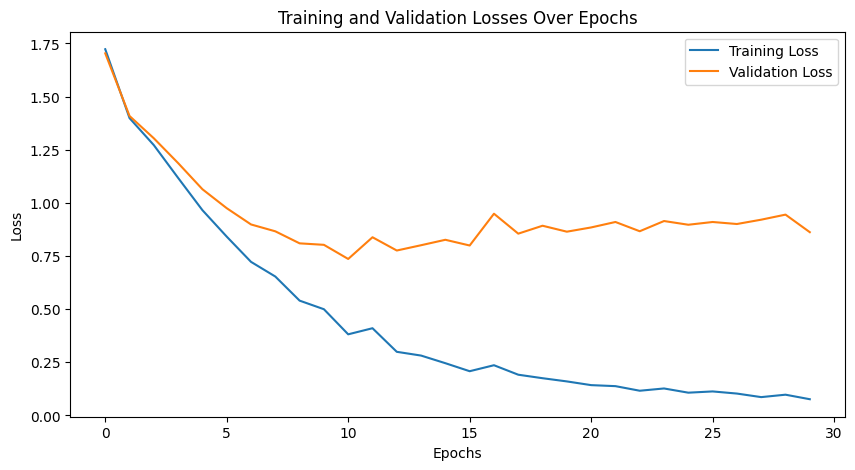

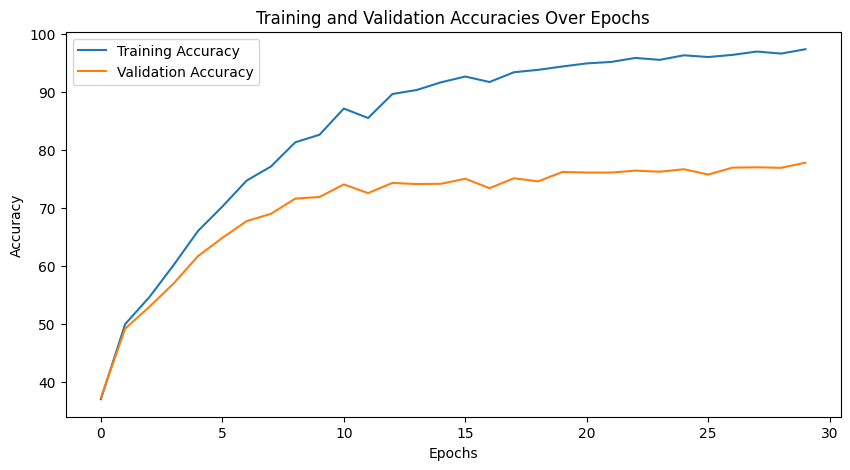

In [17]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracies Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
